(0, 0, 566, 315)


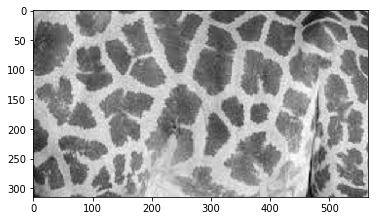

In [182]:
#creating a colormap
from matplotlib.colors import LinearSegmentedColormap
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red = LinearSegmentedColormap('Red', cdict)

#cropping the image
from PIL import Image
import cv2
im = Image.open('giraffe.png');
width, height=im.size
area = (0,0,width, height )
print(area)
im2 = im.crop(area)
im2.save('giraffe.tif')
img = cv2.imread('giraffe.tif',0)
#im2.show()
plt.imshow(img, cmap='gray' )

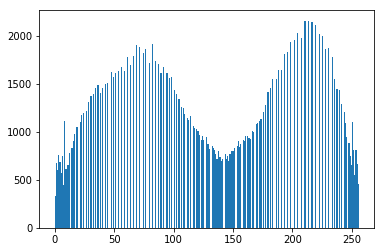

In [171]:
#plotting the equalized histogram
import matplotlib.pyplot as plt
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256,[0,256])
plt.show()
#if you don't say plt.show() then it prints the array

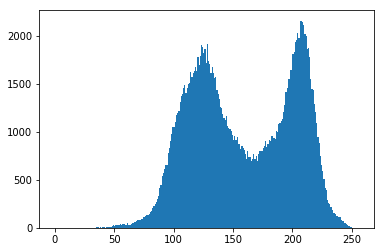

In [172]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

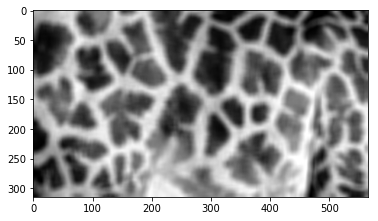

In [197]:
#blurring 
ablur = cv2.blur(equ,(12, 12))
plt.imshow(ablur, cmap='gray', interpolation='sinc')

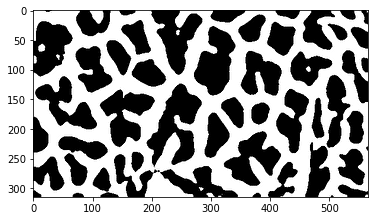

In [198]:
#thresholding using average blur and mean threshold
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,49,4) 
plt.imshow(a_mthres, cmap='gray', interpolation='sinc')

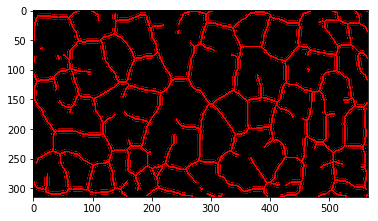

In [199]:
#skeletonizing 
from skimage.morphology import skeletonize, remove_small_objects
adaptiveskeleton = skeletonize(a_mthres)
plt.imshow(adaptiveskeleton, cmap=red, interpolation='sinc') 

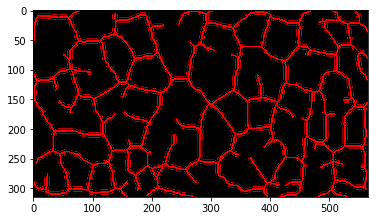

In [200]:
#cleaning skeleton
cleanskel=remove_small_objects(adaptiveskeleton, min_size=70, connectivity=3)
plt.imshow(cleanskel, cmap=red, interpolation='sinc') 

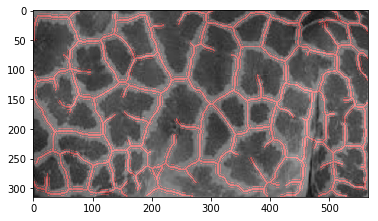

In [201]:
#overlaying the skeleton and original image
plt.imshow(img, cmap='gray', alpha= .9)
plt.imshow(cleanskel, cmap=red, interpolation='sinc', alpha=0.4) 

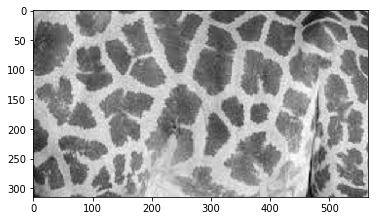

In [202]:
plt.imshow(img, cmap='gray')

In [179]:
#https://www.mathworks.com/help/matlab/ref/colormap.html
#copper cmap is kind of realistic